#                  *Classifying Netflix Streaming Content Using Text*

##### Import statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon
data = pd.read_csv('netflix_titles.csv')

##### Exploratory Data Analysis

In [54]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [55]:
data.shape

(8807, 12)

In [56]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [57]:
data = data.dropna(axis=0)

In [58]:
data.duplicated().sum()

np.int64(0)

In [59]:
data.nunique()

show_id         5332
type               2
title           5332
director        3945
cast            5200
country          604
date_added      1453
release_year      72
rating            14
duration         198
listed_in        335
description     5321
dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [61]:
data.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


##### Data Cleaning and Preprocessing 

In [85]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numeric_duration,movie_duration
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,125.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,127.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166,166.0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           5332 non-null   object        
 1   type              5332 non-null   object        
 2   title             5332 non-null   object        
 3   director          5332 non-null   object        
 4   cast              5332 non-null   object        
 5   country           5332 non-null   object        
 6   date_added        5328 non-null   datetime64[ns]
 7   release_year      5332 non-null   int64         
 8   rating            5332 non-null   object        
 9   duration          5332 non-null   object        
 10  listed_in         5332 non-null   object        
 11  description       5332 non-null   object        
 12  numeric_duration  5332 non-null   int64         
 13  movie_duration    5185 non-null   float64       
dtypes: datetime64[ns](1), float64

In [88]:
data['date_added']=pd.to_datetime(data['date_added'],errors = 'coerce')

In [62]:
data.columns
data['numeric_duration'] = data['duration'].str.extract('(\d+)').astype(int)
data['movie_duration'] = data.apply(lambda row: row['numeric_duration'] if row['type'] == 'Movie' else None, axis=1)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cathy\AppData\Local\Temp\ipykernel_33820\548758147.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['numeric_duration'] = data['duration'].str.extract('(\d+)').astype(int)


In [63]:
data['type'].value_counts().reset_index()

,type,count
0,Movie,5185
1,TV Show,147


In [93]:
cat_col=data.select_dtypes(include='object').columns
num_col=data.select_dtypes(include=['int64','float64']).columns

##### Data Visualisation

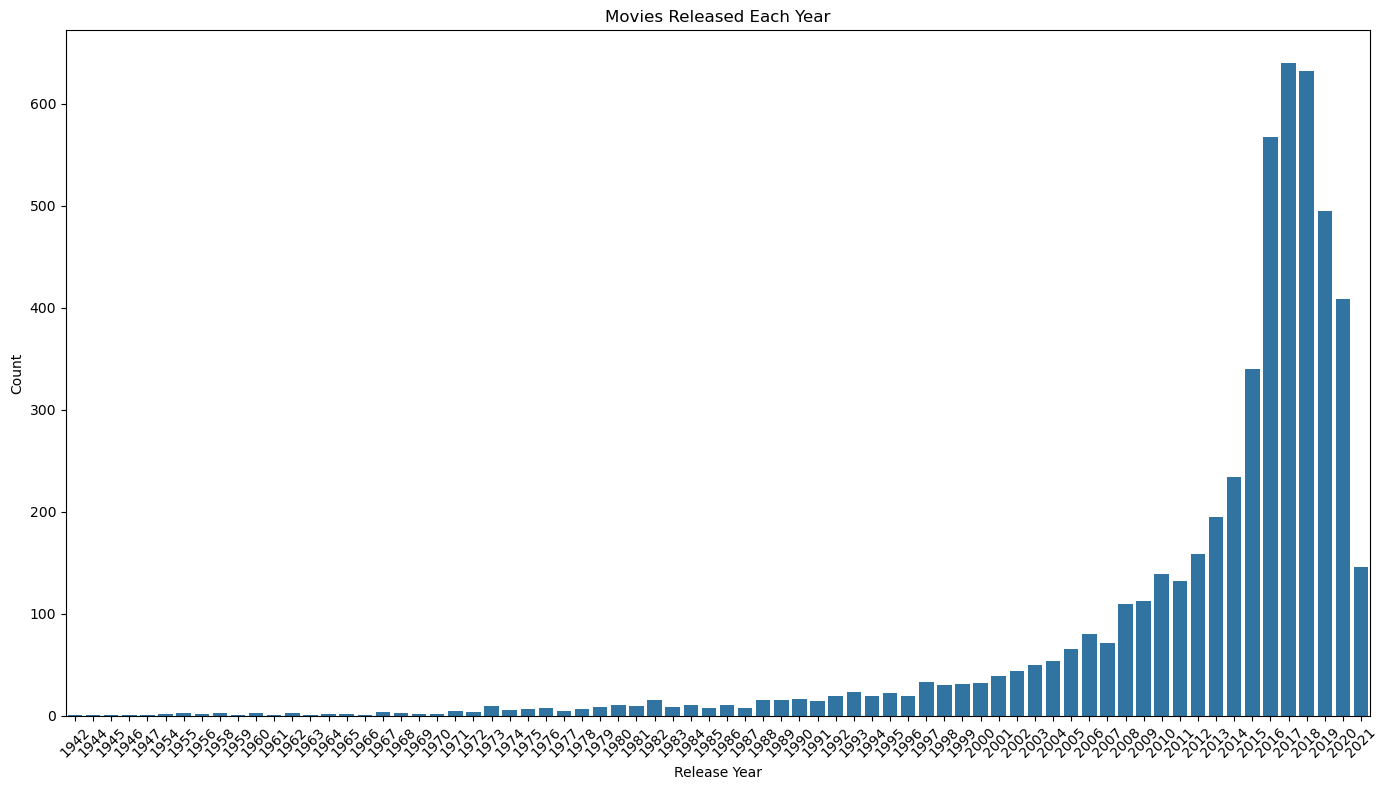

In [64]:
show_data = data[data['type']=='TV Show']
movie_data = data[data['type']=='Movie']
histogram_movies = movie_data['release_year'].value_counts().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='release_year',y='count',data=histogram_movies)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies Released Each Year')
plt.xticks(rotation = 45)
plt.tight_layout()

##### The plot shows the number of movies released per year over time. Very few movies appear in the dataset before the 1970s, with yearly counts remaining low and relatively flat for several decades. From the late 1980s onward, there is a gradual increase in releases, which becomes much steeper after the early 2000s. A sharp rise is visible from around 2010, with movie releases peaking in the mid-to-late 2010s. This period shows the highest concentration of movies in the dataset, likely reflecting the rapid expansion of streaming platforms and increased content production. After the peak, there is a noticeable decline toward the most recent years, which may be due to incomplete data for newer releases or delays in content addition.

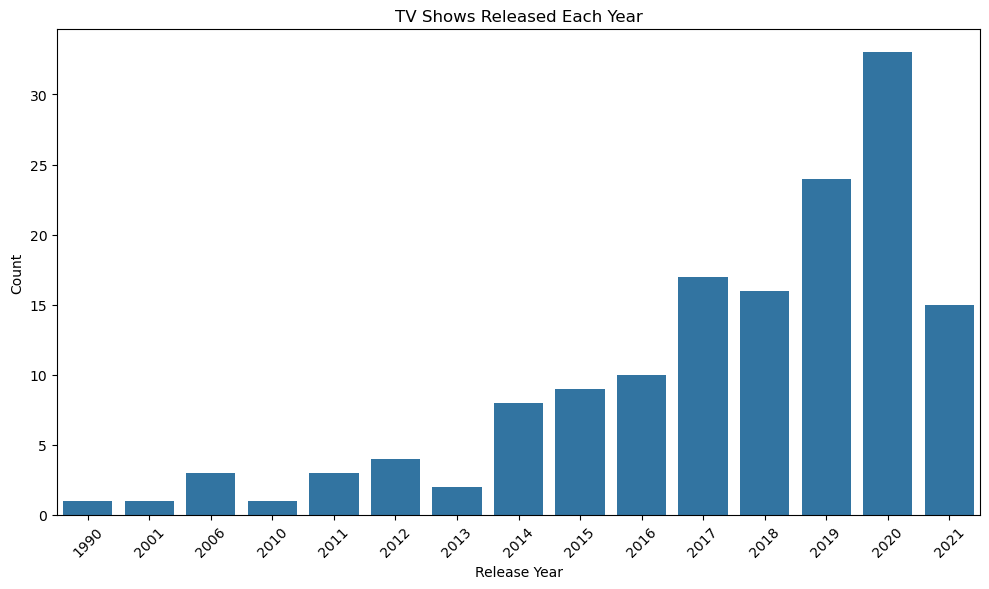

In [65]:
#Histogram for the release year of shows
show_histogram = show_data['release_year'].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='release_year',y='count',data=show_histogram)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('TV Shows Released Each Year')
plt.xticks(rotation = 45)
plt.tight_layout()

In [80]:
movie_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,numeric_duration,movie_duration
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,104.0


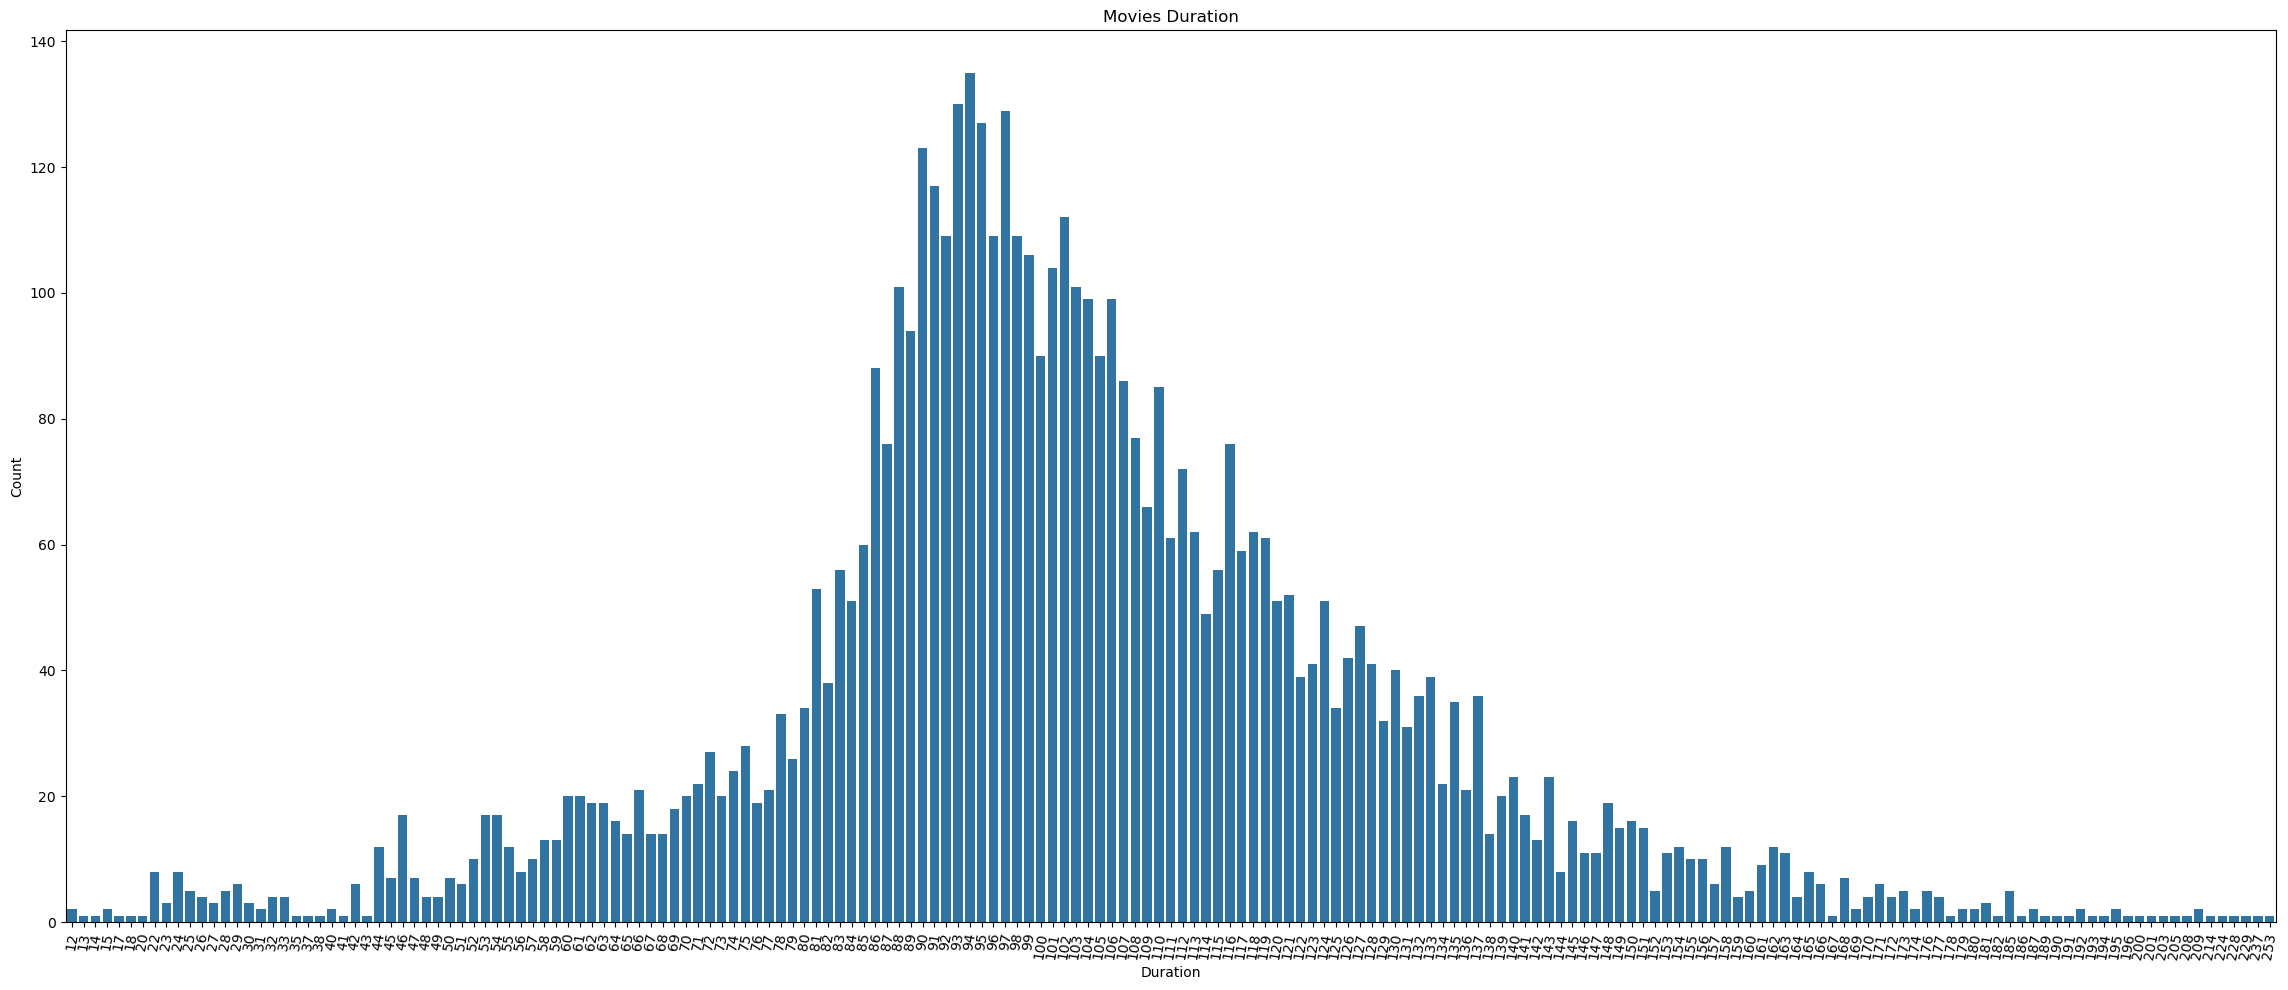

In [83]:
#Finding an mle and mom estimator for movie duration
movie_data = movie_data[movie_data['numeric_duration'] >= 10]
histogram = movie_data['numeric_duration'].value_counts().reset_index()
plt.figure(figsize=(23,10))
sns.barplot(x='numeric_duration',y='count',data=histogram)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Movies Duration')
plt.xticks(rotation = 80)
plt.tight_layout()

#### Modelling

In [97]:
x = data[['description','numeric_duration']]
y = data['type']

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [102]:
preprocessor = ColumnTransformer(transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=3000), 'description'),
        ('num', StandardScaler(), ['numeric_duration'])])

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear',C=0.1)

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
pipe=Pipeline([('preprocessing', preprocessor),('model',model)])
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1038
     TV Show       0.97      1.00      0.98        29

    accuracy                           1.00      1067
   macro avg       0.98      1.00      0.99      1067
weighted avg       1.00      1.00      1.00      1067

[[1037    1]
 [   0   29]]


In [ ]:
model = pipe.named_steps['model']
coefs = model.coef_[0]
print("Mean coef:", np.mean(np.abs(coefs)))
print("Max coef:", np.max(np.abs(coefs)))
np.mean(coefs == 0)



Mean |coef|: 0.0008846589326047174
Max |coef| : 2.6548614567467568


np.float64(0.9996667777407531)

In [ ]:
tfidf = pipe.named_steps['preprocessing'].named_transformers_['text']
feature_names = tfidf.get_feature_names_out()
text_coefs = coefs[:len(feature_names)]
important = [(feature_names[i], text_coefs[i])
    for i in np.where(text_coefs != 0)[0]]
sorted(important, key=lambda x: abs(x[1]), reverse=True)[:15]



[]

In [120]:
numeric_coef = coefs[len(feature_names)]
print("numeric_duration coefficient:", numeric_coef)


numeric_duration coefficient: -2.6548614567467568


The numeric duration feature exhibited a strong negative coefficient (−2.65), indicating that content length is a highly predictive signal for distinguishing movies from TV shows. This dominance resulted in near-perfect classification performance across regularization strengths, effectively masking the influence of textual features.

In [ ]:
feature_names = (pipe.named_steps['preprocessing'].named_transformers_['text'].get_feature_names_out())
coef = pipe.named_steps['model'].coef_[0]
weight = list(zip(feature_names, coef))
top_movie_words = sorted(weight,key=lambda x: x[1],reverse=True)[:15]
top_tv_words = sorted(weight,key=lambda x: x[1])[:15]
print(top_tv_words)


[('christmas', np.float64(-0.3728003391091895)),
 ('word', np.float64(-0.3594867543738875)),
 ('racial', np.float64(-0.35241217309906286)),
 ('unite', np.float64(-0.345810446135729)),
 ('short', np.float64(-0.3172017666392766)),
 ('gift', np.float64(-0.2877010783294118)),
 ('film', np.float64(-0.28365165330365044)),
 ('day', np.float64(-0.2493653211926964)),
 ('monkey', np.float64(-0.20530035798579357)),
 ('offers', np.float64(-0.2051074662634305)),
 ('suicidal', np.float64(-0.20307897052381385)),
 ('santa', np.float64(-0.19846089200413505)),
 ('suspected', np.float64(-0.1964020180782697)),
 ('salesman', np.float64(-0.19428438252455504)),
 ('police', np.float64(-0.19122752627359768))]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1)
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=3000), 'description'),
        ('num', 'passthrough', ['numeric_duration']) ])

rf_pipe = Pipeline([('preprocessing', preprocessor_rf),('model', rf)])

rf_pipe.fit(x_train, y_train)
y_pred_rf = rf_pipe.predict(x_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1038
     TV Show       1.00      1.00      1.00        29

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [ ]:
rf_model = rf_pipe.named_steps['model']
importances = rf_model.feature_importances_
print("Top importance:", np.max(importances))

Top importance: 0.33694990262433905


Random Forest feature importance analysis revealed that content duration alone accounted for approximately one-third of total split importance, confirming that duration is a dominant predictive signal irrespective of model choice